In [42]:
from dilipy.dilithium import *
pk, sk, s1, s2, A, t1, t0, t = Dilithium2.keygen()

In [43]:
msg = b"Signed by dilithium"
sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)
check_verify, Az_minus_ct1, w_prime = Dilithium2.verify(pk, msg, sig)
check_verify

True

In [44]:
def nonzero(a):
    return sum( list(a) )
c_tilde, z, h = Dilithium2._unpack_sig(sig)
alpha = Dilithium2.gamma_2 << 1
print(f"alpha: {Dilithium2.gamma_2*2}\ngamma_2: {Dilithium2.gamma_2}")
signp = w - s2.scale(c) + t0.scale(c)
h2 = (-t0.scale(c)).make_hint(signp, alpha).transpose()
print(f"h:  {h[1,0]}\n{nonzero( h[0,0] )}")
print(f"h2: {list(h2[0,0])}\n{nonzero( h2[0,0] )}")
h == h2                                                                                                                                                                                                       

alpha: 190464
gamma_2: 95232
h:  x^42 + x^69 + x^115 + x^116 + x^120 + x^138 + x^182 + x^216 + x^234 + x^235
11
h2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
11


True

In [45]:
def rec_fromhighbit(a, bit=13):
    return a * 2^bit
def lift(a: list):
    q = 8380417
    return [ (x if x <= round(q/2) else x - q) for x in a ]
print("t1:")
print(rec_fromhighbit(t1[0,0][0]))
print(t[0,0][0])
rec_fromhighbit(t1[0,0][0]-1) - t[0,0][0]
print(list(t0[0,0]))

t1:
1261568
1264817
[3249, 4001, 1278, -845, -991, -3820, -3811, 3129, 630, -351, -738, 1041, 1919, -3869, 2624, 2640, 1016, -2374, 1613, 2641, -2540, 1587, -1379, 1373, 3491, -4041, 2504, -3991, -336, 2804, -115, -465, 2943, -3711, -3877, 3740, -1911, -1032, -4, -3035, -632, 3746, -2471, 2988, 2624, -3129, -3618, -3155, -723, -1856, -3409, 2659, -656, 890, 2931, -1089, -3935, 714, 3259, 2030, 3536, -4006, -1138, 2717, 469, 2846, 2629, -799, -1385, 3906, -2652, 444, 660, 4059, 1345, 3141, 198, 2018, -437, 2316, 1364, -3515, 1301, 2184, -2441, -952, 3208, -2551, 382, -16, -448, 1691, 1500, -2115, 4019, 572, -326, 35, 3725, -3867, 1613, -1707, 2460, -2216, -3524, 2722, -270, 3467, 1309, 2669, -2124, 353, -2111, -398, -1518, 2835, 2190, -1888, -3111, -2730, -1107, 2889, -612, -1625, 145, 3696, 2815, 2154, 2558, 2727, 486, -2745, 145, 1423, -2322, 2886, -1772, -460, -1594, 1596, -1257, -3296, -3698, -3853, 2266, -28, 2771, -469, 2456, 2250, -3143, 180, 3770, 3407, 2781, 3636, 1265, 2979, -

In [46]:
ct0 = -t0.scale(c)
print(f"-ct0: {lift(list(ct0[0,0]))}")
print(f"w-cs2+ct0: {list(signp[0,0])}")
rho, t1_unpack = Dilithium2._unpack_pk(pk)
print(t1 == t1_unpack)
t1_unpack = t1_unpack.scale(int(int(1) << Dilithium2.d))
Az_ct1 = (A @ z)- (t1_unpack.scale(c))
print(Az_ct1 == signp)
print(2^12 * Dilithium2.tau)

-ct0: [-11338, -14158, -439, -10264, -9689, 8403, -8817, 4056, -15747, -4640, 11724, 1642, 61, 9021, -6926, -4905, 14381, -2118, -17165, -1543, -12723, 1628, 8994, 2621, 4176, 4681, 23639, -8049, 500, -36473, 469, 8923, 8341, -1300, -25818, -15888, -10427, 6367, 3379, 8040, -2342, -23811, 15015, -2189, -3571, -2821, -10286, 1011, 9091, -3393, -15903, 32531, -6826, 22007, 475, -3120, 13852, -8103, -4670, 14353, -3880, 11577, 23197, 5641, -16258, 13582, 3196, 17092, 13284, -5930, 10665, -5551, 11554, -2356, -3195, -7751, 9280, 9268, 11208, 19543, 27251, -33039, -14535, -6081, 15067, -13548, -8263, -5649, 20706, 15802, 20490, 2211, -9727, 1024, -195, 5454, -7965, -1783, 10557, -4272, -23163, 7758, -350, 7996, 3493, -25039, -17131, 19335, 16773, -5740, 19491, -2033, 2845, -8098, -12848, -12322, -16964, -5547, 13370, 14043, -13492, 3292, -14184, -21939, 8859, -24735, -3566, 9087, -1271, -22910, 7337, -12022, -46961, -3502, -999, 1847, 18909, 8943, -13878, 13062, 18614, 22277, -4754, -9211, 

In [64]:
allct0 = [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
for i in range(20):
    msg = b"Signed by dilithium111" + (str(i)).encode()
    sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)

    allct0 += [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
# allct0 = lift(-t0.scale(c)[0, 0])
print(allct0)
from collections import Counter
import matplotlib.pyplot as plt

# 统计 allct0 中每个数值的出现次数
counter = Counter(allct0)
print(counter)
sorted_counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
print(sorted_counter)
# 提取 x (values) 和 y (frequencies)
x_values = list(counter.keys())
y_values = list(counter.values())

[-10822, -32067, -4910, 13928, 24888, 25348, 14154, 6605, 5798, 1209, -17885, 24182, 9821, 17674, 17268, -21694, -9304, -2707, -9093, 21100, 8417, -36593, -3881, -28215, -15286, 4009, 44521, 8793, 12406, -25483, -33628, -365, 21629, 4480, 16653, 8820, 5889, -237, -3411, -4540, -15217, 6845, 8084, -2412, -5006, -3064, 10190, 3887, 32283, -27241, -21818, -3289, -11153, -35815, 19189, 1401, -15460, 69, -1510, -1503, 16047, -9134, -10998, 12413, 8835, 6643, -18284, 3172, -651, 16547, 36304, 12896, -26655, -19551, -4606, -10118, 10392, 16534, 11647, -4652, 4725, -12535, -12279, 32137, 22099, 5353, -9057, -23907, -11162, -3456, -33239, -12906, 22025, -3179, -2683, -5792, -40933, -10702, 30679, 2887, 7708, -858, -31334, 6044, 23367, 21373, 12136, 11417, -5964, -12180, -21027, -10067, -4426, 8322, -1938, -27201, -15497, -17383, -17078, -21875, 19877, -6742, -10639, 11380, -4729, -17375, -10984, 631, -471, 4101, -4043, 8778, 1609, -3618, 11058, 8863, 26501, -1391, -4518, -7013, 28487, -1530, 35

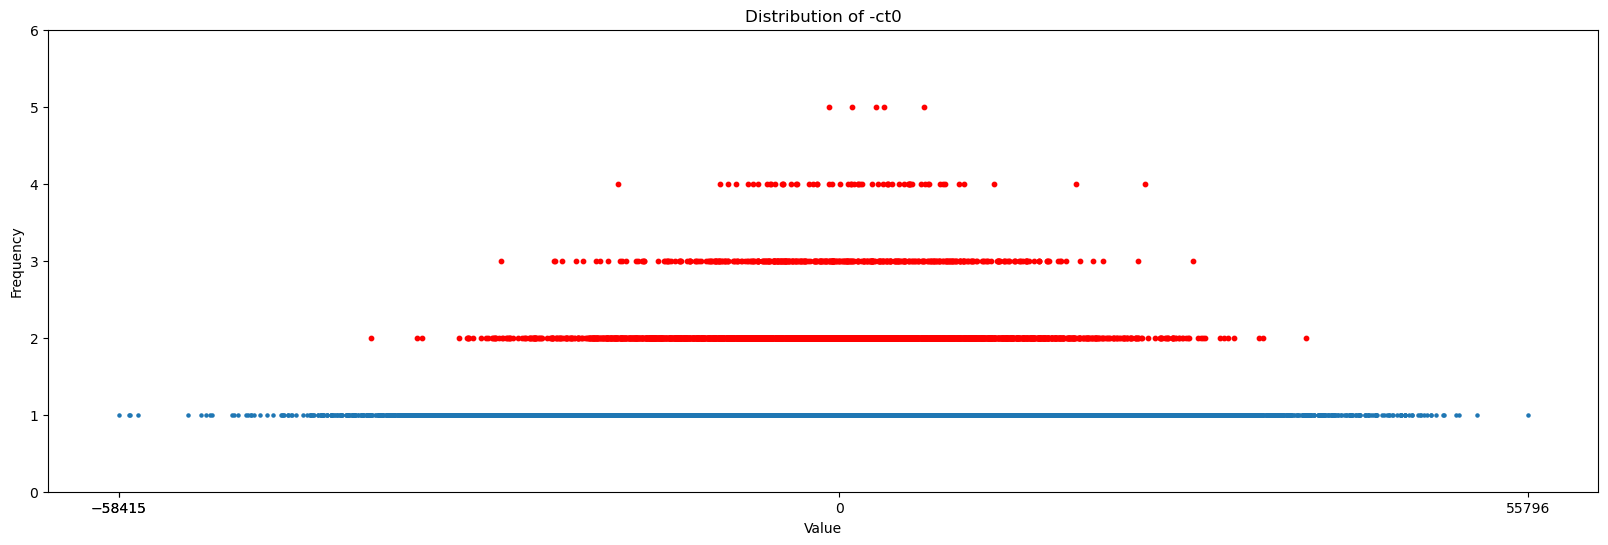

In [65]:
plt.figure(figsize=(20, 6))  # 设置图像大小，宽度为20，高度为6

# 绘制所有点
plt.scatter(x_values, y_values, s=5, label="All Points")  # 蓝色点表示所有数据

# 筛选出现次数超过一次的数值
highlight_x = [key for key, value in counter.items() if value > 1]
highlight_y = [counter[key] for key in highlight_x]

# 在 x 轴上标记这些数值为红色点
plt.scatter(highlight_x, highlight_y, s=10, color="red", label="Highlighted Points")  # 红色点表示出现次数超过一次的数值

# 设置 x 轴的刻度为最小值、0 和最大值，以及对称的负最大值
symmetric_max = max(abs(min(x_values)), abs(max(x_values)))
x_ticks = [min(x_values), 0, max(x_values), -symmetric_max]
plt.xticks(x_ticks)

# 设置 y 轴的刻度为整数
plt.yticks(range(0, max(y_values) + 2))

# 设置标签和标题
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of -ct0")

# 显示图表
plt.show()

In [62]:
N(54374 / Dilithium2.tau)

1394.20512820513